In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
test

,id,letter,0,1,2,3,4,5,6,7,...,774,775,776,777,778,779,780,781,782,783
0,2049,L,0,4,0,2,4,2,3,1,...,2,0,4,2,2,4,3,4,1,4
1,2050,C,4,1,4,0,1,1,0,2,...,0,3,2,4,2,4,2,2,1,2
2,2051,S,0,4,0,1,3,2,3,0,...,1,3,2,0,3,2,3,0,1,4
3,2052,K,2,1,3,3,3,4,3,0,...,3,0,3,2,4,1,0,4,4,4
4,2053,W,1,0,1,1,2,2,1,4,...,4,3,1,4,0,2,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,22524,P,1,2,1,1,0,0,0,2,...,0,1,3,0,3,0,4,3,1,4
20476,22525,S,4,1,1,4,0,0,1,1,...,1,3,1,0,0,1,3,1,2,0
20477,22526,B,4,2,1,3,2,1,3,0,...,3,2,3,4,1,0,3,3,1,1
20478,22527,K,1,1,2,3,4,0,4,3,...,2,0,0,4,3,3,3,4,4,2


In [4]:
#0~784에는 28*28이미지의 화솟값이 들어있음.
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [5]:
len(train)

2048

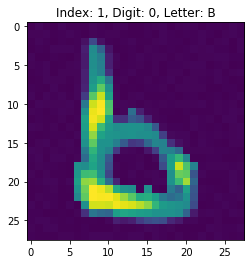

In [6]:
idx = 1
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int) #0부터 끝까지
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [ ]:
# #사진저장
# import cv2
# import os

# #사진으로 저장
# for i in range(0,2048):
#     img = train.loc[i, '0':].values.reshape(28, 28).astype(int) #0부터 끝까지
#     path = r'C:\Users\jmlee\Desktop\dacon\picture'
#     print(i)
#     cv2.imwrite(os.path.join(path , str(i)+'.jpg'), img)
# cv2.waitKey(0)

# train

In [7]:
x_train = train.drop(['id', 'digit', 'letter'], axis=1).values  #화솟값
x_train = x_train.reshape(-1, 28, 28, 1)  #이미지갯수, 가로, 세로, 컬러
x_train = x_train/255  #화솟값정규화

#원핫인코딩
y = train['digit']
y_train = np.zeros((len(y), len(y.unique()))) #중복제거 유일한 원소 반환
for i, digit in enumerate(y):  #리스트가 있는 경우, 순서, 리스트값 전달
    #print(i) 는 0~
    #print(digit)  digit순서대로들어감.
    y_train[i, digit] = 1

In [8]:
x_train

array([[[[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00784314],
         [0.        ],
         [0.01568627]],

        [[0.        ],
         [0.00392157],
         [0.01176471],
         ...,
         [0.01568627],
         [0.00392157],
         [0.01176471]],

        [[0.00784314],
         [0.        ],
         [0.01568627],
         ...,
         [0.01176471],
         [0.01176471],
         [0.01176471]],

        ...,

        [[0.00784314],
         [0.00392157],
         [0.00784314],
         ...,
         [0.01568627],
         [0.00392157],
         [0.        ]],

        [[0.01176471],
         [0.01176471],
         [0.01176471],
         ...,
         [0.01176471],
         [0.01176471],
         [0.        ]],

        [[0.01176471],
         [0.00784314],
         [0.00784314],
         ...,
         [0.01568627],
         [0.01176471],
         [0.01568627]]],


       [[[0.        ],
         [0.01568627],
         [0.  

In [9]:
#0-9까지 digit에 해당하는 부분을 1로 저장
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# -----------------------------------------------------------

# cnn 모델 정확도 높이는 방법 (지도학습)
- __매개변수 갱신(고급 경사하강법)__  

- __가중치 초기값 설정__  
 
- __배치 정규화__: 값이 활성화 함수를 통과하기 전에 가중의 변화를 줄이는 것이                  목표

- __Dropout/weight decay__ : overfitting 규제   

- __적절한 하이퍼파라미터 값 찾기__  

데이터 늘리기  
레이어 추가하기

# cnn_model

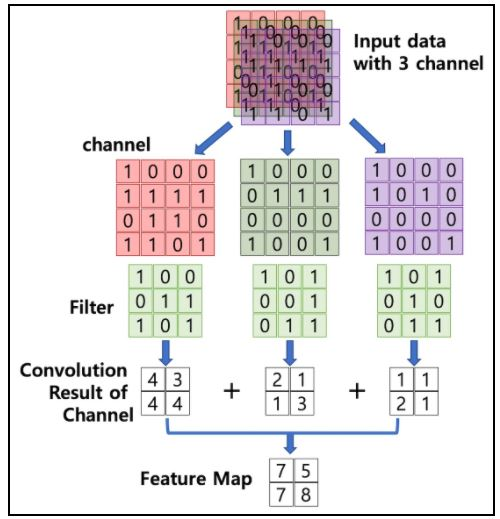

In [21]:
from IPython.display import Image
Image(r"C:\Users\jmlee\Desktop\convolution.JPG")
# print("convolution 설명")

In [16]:
x_train.shape[1:]

(28, 28, 1)

In [9]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:]) #x_train.shape[1:]=(28,28,1)
    
    #배치 정규화는 활성화함수 통과 전, 가중의 변화를 줄이는 것이 목표
    bn = tf.keras.layers.BatchNormalization()(inputs)
    
    #첫번째 인자= 컨볼루션 필터의 수 => 5*5 크기의 필터를 128개 사용.
    #stride 크기만큼 이미지 이동
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    #출력결과: 1+(입력크기-필터크기)/stride 크기= 1+(28-5)/1=24
    
    bn = tf.keras.layers.BatchNormalization()(conv) 
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
    bn = tf.keras.layers.BatchNormalization()(pool)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    #dense: Dense 레이어는 입력과 출력을 모두 연결해줌. relu와 주로 같이 쓰임.
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)
    
    bn = tf.keras.layers.BatchNormalization()(dense)
    
    #softmax: 가장 큰 출력값을 부여받은 클래스가 확률이 가장 높은것으로 이용
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train, y_train, epochs=100)

# 변형1: layer 추가하기, conv2d 출력값 바꿈.  
=> 정확도 0.759

In [23]:
def create_cnn_model(x_train):
    inputs = tf.keras.layers.Input(x_train.shape[1:])
    
    #배치 정규화는 활성화함수 통과 전, 가중의 변화를 줄이는 것이 목표
    bn = tf.keras.layers.BatchNormalization()(inputs)
    
    #첫번째 인자= 컨볼루션 필터의 수 => 5*5 크기의 필터를 128개 사용.
    #stride 크기만큼 이미지 이동
    conv = tf.keras.layers.Conv2D(128, kernel_size=5, strides=1, padding='same', activation='relu')(bn)
    #출력결과: 1+(입력크기-필터크기)/stride 크기= 1+(28-5)/1=24
    #sub-sampling을 거치면 출력이 줄어듬. 줄어든만큼 feature map도 증가시키는것이 좋음.
    
    bn = tf.keras.layers.BatchNormalization()(conv) 
    conv = tf.keras.layers.Conv2D(128, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
    
    bn = tf.keras.layers.BatchNormalization()(conv) 
    conv = tf.keras.layers.Conv2D(256, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
    bn = tf.keras.layers.BatchNormalization()(pool)
    
    conv = tf.keras.layers.Conv2D(512, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Conv2D(512, kernel_size=2, strides=1, padding='same', activation='relu')(bn)
    pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)

    flatten = tf.keras.layers.Flatten()(pool)

    bn = tf.keras.layers.BatchNormalization()(flatten)
    
    #dense: Dense 레이어는 입력과 출력을 모두 연결해줌. relu(은닉층 활성화 함수)와 주로 같이 쓰임.
    #첫번째 파라미터: 출력 뉴런 수
    dense = tf.keras.layers.Dense(1000, activation='relu')(bn)
    bn = tf.keras.layers.BatchNormalization()(dense)
    
    #softmax: 가장 큰 출력값을 부여받은 클래스가 확률이 가장 높은것으로 이용
    #다중 클래스 분류에서 주로 출력층에 사용
    outputs = tf.keras.layers.Dense(10, activation='softmax')(bn)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

    return model

In [24]:
model = create_cnn_model(x_train)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       65664     
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 256)       1313

In [ ]:
model.fit(x_train, y_train, epochs=100)

# 변형 2  
layer가 깊다고 성능이 좋은것이 아님.

In [18]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

def basic_cnn():
    model = Sequential()
    model.add(Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = basic_cnn()
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                490050    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
_______________________________________________

In [22]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
2048/2048 [==============================] - 3s 1ms/step - loss: 0.9487 - accuracy: 0.7544
Epoch 2/100
2048/2048 [==============================] - 3s 1ms/step - loss: 0.3523 - accuracy: 0.8960
Epoch 3/100
2048/2048 [==============================] - 3s 1ms/step - loss: 0.1825 - accuracy: 0.9565
Epoch 4/100
2048/2048 [==============================] - 3s 2ms/step - loss: 0.1076 - accuracy: 0.9785
Epoch 5/100
2048/2048 [==============================] - 3s 1ms/step - loss: 0.0717 - accuracy: 0.9897
Epoch 6/100
2048/2048 [==============================] - 3s 1ms/step - loss: 0.0517 - accuracy: 0.9951
Epoch 7/100
2048/2048 [==============================] - 3s 1ms/step - loss: 0.0357 - accuracy: 0.9980
Epoch 8/100
2048/2048 [==============================] - 3s 1ms/step - loss: 0.0245 - accuracy: 0.9985
Epoch 9/100
2048/2048 [==============================] - 3s 1ms/step - loss: 0.0186 - accuracy: 1.0000
Epoch 10/100
2048/2048 [==============================] - 3s 1ms/step - l

# predict

In [ ]:
x_test = test.drop(['id', 'letter'], axis=1).values
x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test/255

submission = pd.read_csv('data/submission.csv')
submission['digit'] = np.argmax(model.predict(x_test), axis=1)
submission.head()

In [24]:
submission.to_csv('baseline.csv', index=False)